## Initiate Project

In [29]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.base import BaseEstimator, TransformerMixin
from matplotlib.ticker import FuncFormatter
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

RSEED = 42

In [30]:
# Read data
df_tanzania=pd.read_csv("data/Train.csv")

In [31]:
# As our target is TZN money, function to have custom format to make the plots more readable. 
def thousands_formatter(x, pos):
    return f'{int(x):,}'

In [32]:
df_continents = pd.read_csv('data/continents.csv')
df_continents.columns = df_continents.columns.str.lower()

In [33]:
# Transform columns to "total nights" and "total people"
df_tanzania["total_nights"] = df_tanzania["night_mainland"] + df_tanzania["night_zanzibar"]
df_tanzania["total_people"] = df_tanzania["total_male"] + df_tanzania["total_female"]

In [34]:
# Create the new column with bins to indicate trip_category
df_tanzania['trip_category'] = pd.cut(
    df_tanzania['total_people'],
    bins=[-1, 1, 2, 5,float('inf')],  # Define the bin edges
    labels=['Alone', 'Couple', 'Family', 'Group', ],  # Labels for each bin
    right=True ) # Include


In [35]:
# df_tanzania["country"].unique()

#some country names are misspelled. We cannot assign to continent or region if not fixed

In [36]:
corrections = {
    'SWIZERLAND': 'SWITZERLAND',
    'UNITED KINGDOM': 'UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND',
    'MALT': 'MALTA',
    'UAE': 'UNITED ARAB EMIRATES',
    'BURGARIA': 'BULGARIA',
    'DRC': 'DEMOCRATIC REPUBLIC OF THE CONGO',
    'KOREA': 'REPUBLIC OF KOREA', 
    'SWAZILAND': 'ESWATINI',
    'CZECH REPUBLIC': 'CZECHIA', 
    'UKRAIN': 'UKRAINE',
    'SCOTLAND': 'UNITED KINGDOM',
    'RUSSIA': 'RUSSIAN FEDERATION', 
    'TRINIDAD TOBACCO': 'TRINIDAD AND TOBAGO',
    'COMORO': 'COMOROS',
    'IRAN': 'IRAN (ISLAMIC REPUBLIC OF)', 
    'CAPE VERDE': 'CABO VERDE', 
    'COSTARICA': 'COSTA RICA',
    'TAIWAN': 'CHINA', # I had to do this as it seems is not in the UN db I have
    'PHILIPINES': 'PHILIPPINES',
    'IVORY COAST': 'CÔTE D’IVOIRE',
    'DJIBOUT': 'DJIBOUTI',
    'MORROCO': 'MOROCCO'
}

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104]),
 [Text(0, 0, 'SOUTH AFRICA'),
  Text(1, 0, 'ITALY'),
  Text(2, 0, 'CANADA'),
  Text(3, 0, 'UNITED KINGDOM'),
  Text(4, 0, 'CHINA'),
  Text(5, 0, 'UNITED STATES OF AMERICA'),
  Text(6, 0, 'NETHERLANDS'),
  Text(7, 0, 'DENMARK'),
  Text(8, 0, 'QATAR'),
  Text(9, 0, 'GERMANY'),
  Text(10, 0, 'NEW ZEALAND'),
  Text(11, 0, 'AUSTRALIA'),
  Text(12, 0, 'FRANCE'),
  Text(13, 0, 'ZIMBABWE'),
  Text(14, 0, '

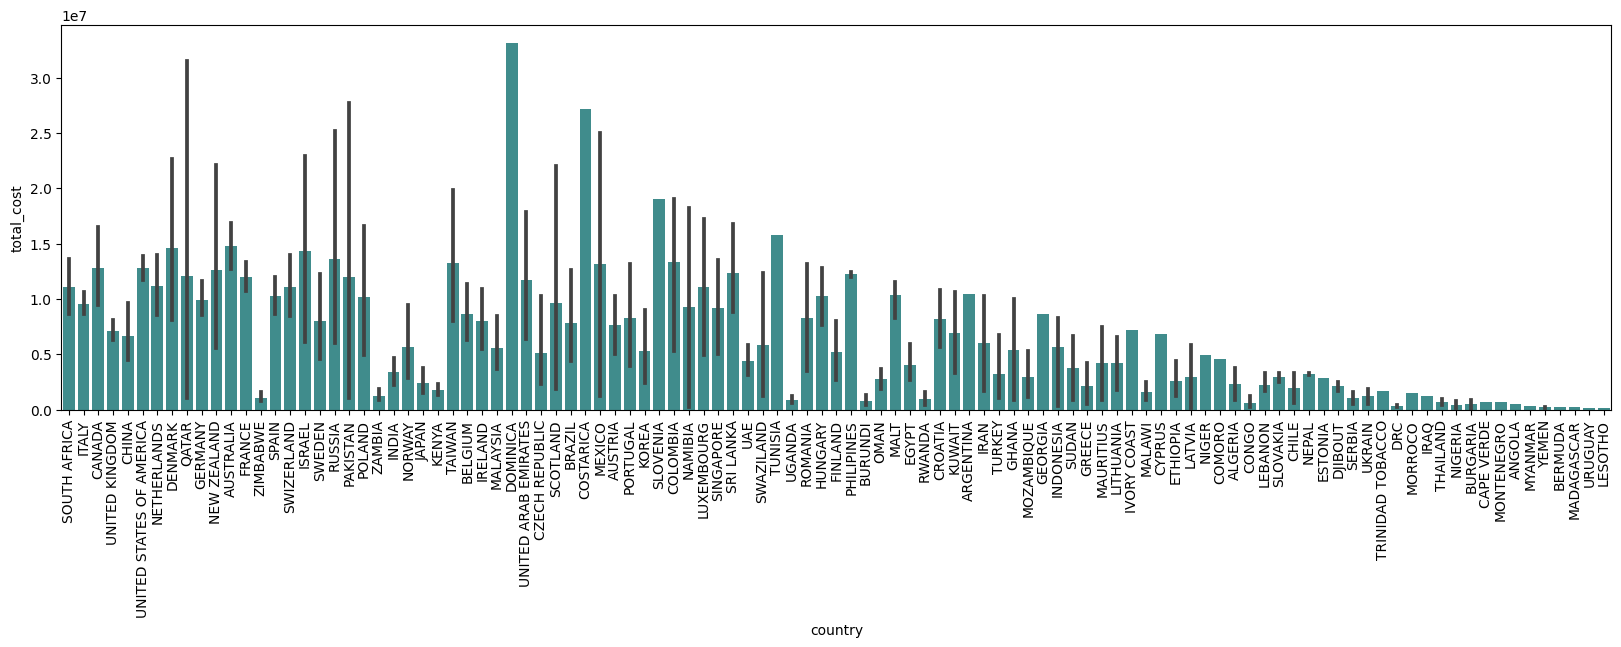

In [37]:
df_tanzania_sorted = df_tanzania.sort_values(by="total_cost", ascending=False)


fig, ax = plt.subplots(1,1, figsize=(20,5))
sns.barplot(df_tanzania, x=df_tanzania_sorted["country"], y=df_tanzania_sorted["total_cost"], color = "teal", alpha = 0.8, ax=ax)
plt.xticks(rotation=90)

In [38]:
# Apply the corrections using replace()
df_tanzania['country'] = df_tanzania['country'].replace(corrections)

In [39]:
df_tanzania = pd.merge(df_tanzania, df_continents[['country', 'region_1',"continent"]], on='country', how='left')

In [40]:
df_tanzania = df_tanzania[df_tanzania['country'] != 'UNITED KINGDOM'] # I don't know why, but 4 observations form UK are not repalced. NO time, i drop them

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'SOUTHERN AFRICA'),
  Text(1, 0, 'SOUTHERN EUROPE'),
  Text(2, 0, 'NORTHERN AMERICA'),
  Text(3, 0, 'NORTHERN EUROPE'),
  Text(4, 0, 'EASTERN ASIA'),
  Text(5, 0, 'WESTERN EUROPE'),
  Text(6, 0, 'WESTERN ASIA'),
  Text(7, 0, 'AUSTRALIA AND NEW ZEALAND'),
  Text(8, 0, 'EASTERN AFRICA'),
  Text(9, 0, 'EASTERN EUROPE'),
  Text(10, 0, 'SOUTHERN ASIA'),
  Text(11, 0, 'SOUTH-EASTERN ASIA'),
  Text(12, 0, 'CARIBBEAN'),
  Text(13, 0, 'SOUTH AMERICA'),
  Text(14, 0, 'CENTRAL AMERICA'),
  Text(15, 0, 'NORTHERN AFRICA'),
  Text(16, 0, 'WESTERN AFRICA'),
  Text(17, 0, 'MIDDLE AFRICA')])

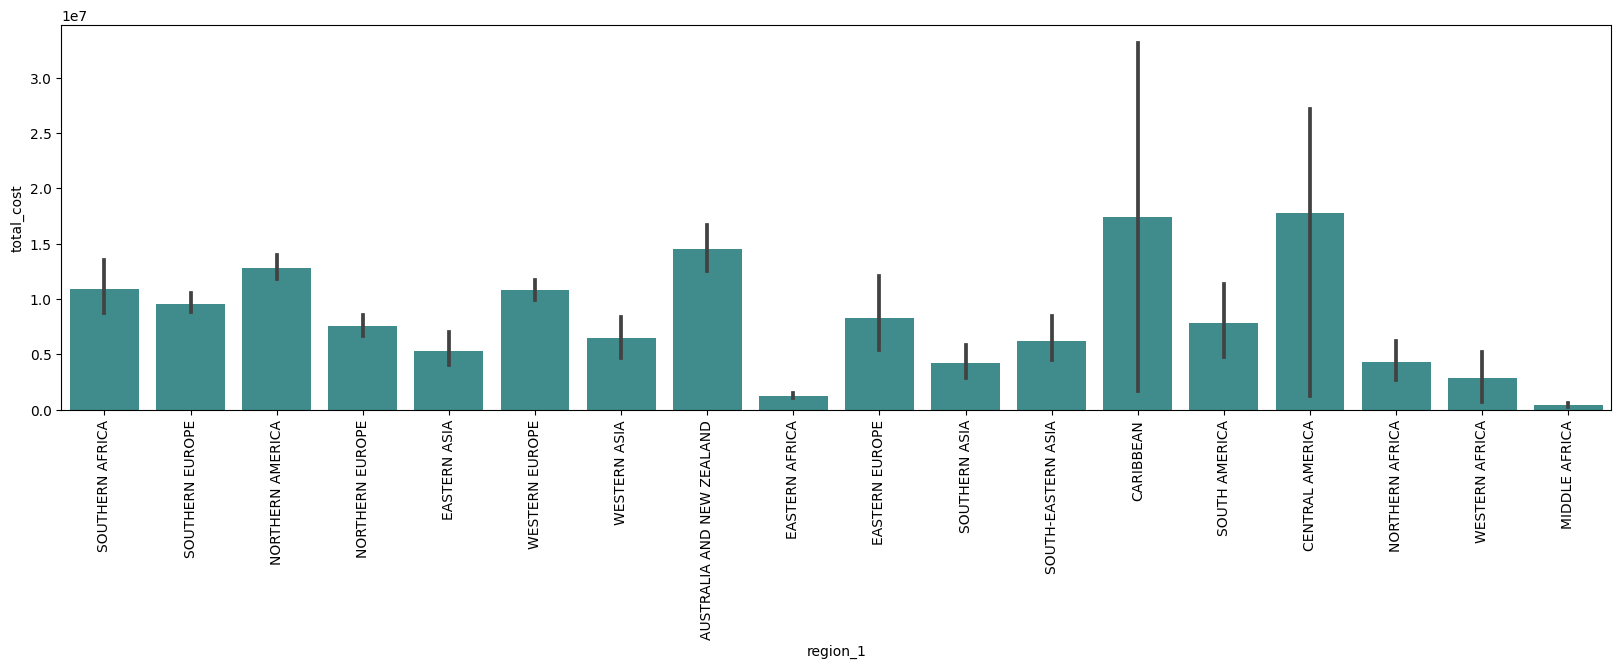

In [41]:
df_tanzania_sorted = df_tanzania.sort_values(by="total_cost", ascending=False)


fig, ax = plt.subplots(1,1, figsize=(20,5))
sns.barplot(df_tanzania, x=df_tanzania_sorted["region_1"], y=df_tanzania_sorted["total_cost"], color = "teal", alpha = 0.8, ax=ax)
plt.xticks(rotation=90)

In [12]:
# df_tanzania.isna().sum()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Leisure and Holidays'),
  Text(1, 0, 'Visiting Friends and Relatives'),
  Text(2, 0, 'Business'),
  Text(3, 0, 'Meetings and Conference'),
  Text(4, 0, 'Volunteering'),
  Text(5, 0, 'Scientific and Academic'),
  Text(6, 0, 'Other')])

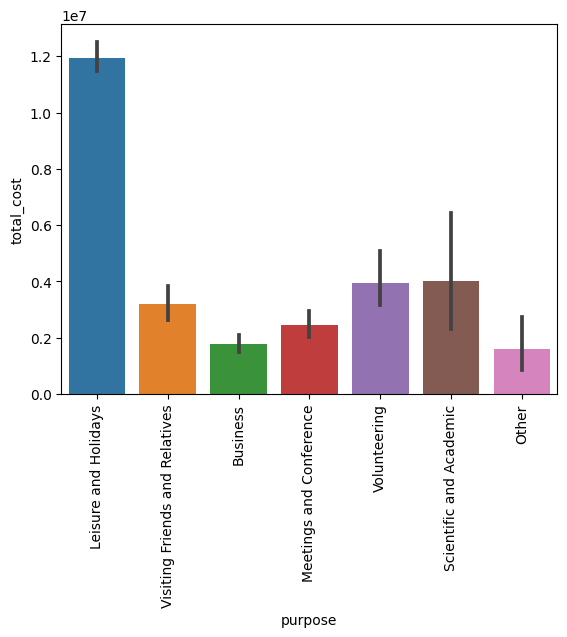

In [68]:
sns.barplot(df_tanzania, x="purpose", y="total_cost")
plt.xticks(rotation=90)

In [69]:
corrections_main_activity = corrections = {
    'Wildlife tourism': 'Wildlife Tourism',
    'Cultural tourism': 'Cultural Tourism',
    'Mountain climbing': 'Sport Tourism',
    'Beach tourism': 'Beach Tourism',
    'Conference tourism': 'Business Tourism',
    'Hunting tourism': 'Sport Tourism',
    'Bird watching': 'Sport Tourism', 
    'business': 'Business Tourism',
    'Diving and Sport Fishing': 'Sport Tourism', 
}

In [70]:
# Apply the corrections using replace()
df_tanzania['main_activity'] = df_tanzania['main_activity'].replace(corrections_main_activity)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Wildlife Tourism'),
  Text(1, 0, 'Cultural Tourism'),
  Text(2, 0, 'Sport Tourism'),
  Text(3, 0, 'Beach Tourism'),
  Text(4, 0, 'Business Tourism')])

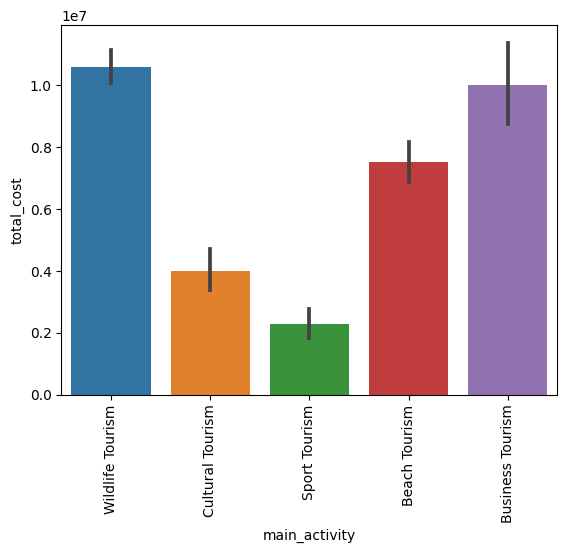

In [71]:
sns.barplot(df_tanzania, x="main_activity", y="total_cost")
plt.xticks(rotation=90)


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Wildlife Tourism'),
  Text(1, 0, 'Cultural Tourism'),
  Text(2, 0, 'Sport Tourism'),
  Text(3, 0, 'Beach Tourism'),
  Text(4, 0, 'Business Tourism')])

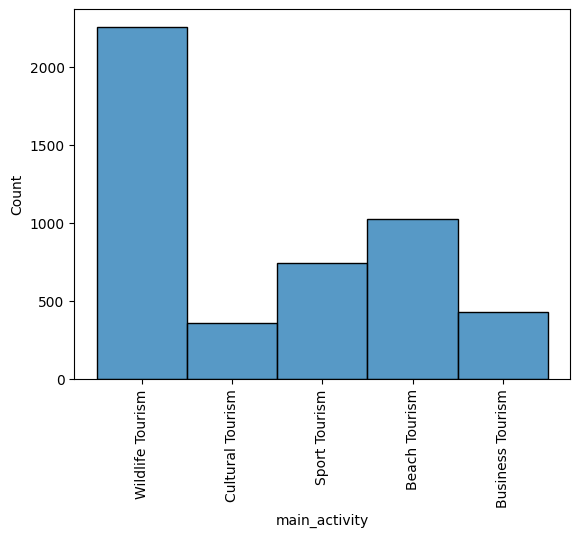

In [72]:
sns.histplot(df_tanzania["main_activity"])
plt.xticks(rotation=90)

In [73]:
# sns.barplot(df_tanzania,x="trip_category", y="total_cost")

## Train-Test Split

In [74]:
# split train-test data. We have dropped:
# Decision to drop also all numerical features, as we do not see correlation, plus other features that don't seem to have an impact on the final cost

X = df_tanzania.drop(['total_cost','ID', "most_impressing", "age_group", "first_trip_tz","country",'total_female','total_male',"total_people", "main_activity", "total_nights" ,'payment_mode','info_source','purpose','travel_with'],axis=1)
y = df_tanzania.total_cost

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=RSEED)
# Build new data frame for EDA

df_tanzania_train = X_train.join(y_train)
df_tanzania_test = X_test.join(y_test)

## Evaluate Target 

In [75]:
df_tanzania.shape

(4809, 26)

In [76]:
df_tanzania.columns

Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'most_impressing',
       'total_cost', 'total_nights', 'total_people', 'trip_category'],
      dtype='object')

In [77]:
# # Plotting the boxplot
# sns.boxplot(df_tanzania_train["total_cost"], color="teal")
# plt.xticks([])  # Removes the x-axis ticks


# # Adding the formatter to the y-axis
# plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# # Adding label
# plt.ylabel("Total Cost (TZN)")

# # Display the plot
# plt.show()

In [78]:
# Define function to print the whiskers of a boxplot

def calculate_whiskers(df, column):
    """
    Calculate the lower and upper whiskers for a specified column in a DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        column (str): The column name to calculate whiskers for.

    Returns:
        tuple: (lower_whisker, upper_whisker)
    """
    # Get descriptive statistics for the column
    stats = df[column].describe()
    Q1 = stats['25%']
    Q3 = stats['75%']
    IQR = Q3 - Q1

    # Calculate the lower whisker
    lower_whisker = max(
        df[column][df[column] >= (Q1 - 1.5 * IQR)].min(), 
        df[column].min()
    )
    
    # Calculate the upper whisker
    upper_whisker = min(
        df[column][df[column] <= (Q3 + 1.5 * IQR)].max(), 
        df[column].max()
    )
    
    return lower_whisker, upper_whisker

In [79]:
lower, upper = calculate_whiskers(df_tanzania, "total_cost")
print("Upper Whisker total cost", upper)

Upper Whisker total cost 23635950.0


In [80]:
# #Remove outliers
# df_tanzania = df_tanzania.query("total_cost <= 23635950.0")

In [81]:
# # Create the figure and first y-axis
# fig, ax1 = plt.subplots(figsize=(10, 6))

# # Plot the bar chart for total cost
# sns.barplot(x=df_tanzania_train["trip_category"], y=df_tanzania_train.total_cost, ax=ax1, color="teal", alpha = 0.8)
# plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
# ax1.set_ylabel("Total Cost (TZS)", fontsize=12, color="teal")
# ax1.set_xlabel("Trip Category", fontsize=12)
# ax1.tick_params(axis='y', labelcolor="teal")
# ax1.tick_params(axis='x', rotation=0)
# ax1.set_title("Total Cost by Trip Category", fontsize=14, pad=15)

## EDA

In [82]:
df_tanzania_train.isna().sum()

tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
trip_category            5
total_cost               0
dtype: int64

In [83]:
# # Sort the DataFrame by 'total_cost' in descending order
# df_tanzania_sorted = df_tanzania_train.sort_values(by="total_cost", ascending=False)

# # Create the plot
# fig, ax = plt.subplots(1, 1, figsize=(20, 5))
# sns.barplot(y=df_tanzania_sorted["total_cost"], x=df_tanzania_sorted["region_1"], ax=ax)
# plt.xticks(rotation=90)

# plt.show()

In [84]:
# sns.histplot(df_tanzania_train["region_1"], kde=True)
# plt.xticks(rotation=90)


In [85]:
# # Create the plot
# df_tanzania_sorted = df_tanzania_train.sort_values(by="total_cost", ascending=True)

# fig, ax = plt.subplots(1, 1, figsize=(20, 5))
# sns.barplot(y=df_tanzania_sorted["total_cost"], x=df_tanzania_sorted["region_1"], hue = df_tanzania_sorted["first_trip_tz"], ax=ax)
# plt.xticks(rotation=90)

# plt.show()

In [86]:
# sns.barplot(df_tanzania_train, x="age_group", y="total_cost")
# plt.xticks(rotation=90)

In [87]:
# sns.histplot(df_tanzania_train["age_group"])
# plt.xticks(rotation=90)


In [88]:
df_tanzania_train.columns


Index(['tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'trip_category', 'total_cost'],
      dtype='object')

In [89]:
# # Create the plot
# df_tanzania_sorted = df_tanzania_train.sort_values(by="total_cost", ascending=True)
# sns.barplot(df_tanzania_train, x="main_activity", y="total_cost")
# plt.xticks(rotation=90)


In [90]:
# sns.barplot(df_tanzania_train, x="total_people", y="total_cost")
# plt.xticks(rotation=90)

In [91]:
df_tanzania_train.columns

Index(['tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'trip_category', 'total_cost'],
      dtype='object')

In [92]:
# Check for empty values. We have them in "total_female", "total_male" and mostly in "travel_with"

df_tanzania_train.isnull().sum()

tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
trip_category            5
total_cost               0
dtype: int64

In [93]:
# most of our features are categorical, besides four of them: 
# total_female, total_male, night_mainland, night_zanzibar and the total cost

df_tanzania_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3606 entries, 3075 to 860
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   tour_arrangement       3606 non-null   object  
 1   package_transport_int  3606 non-null   object  
 2   package_accomodation   3606 non-null   object  
 3   package_food           3606 non-null   object  
 4   package_transport_tz   3606 non-null   object  
 5   package_sightseeing    3606 non-null   object  
 6   package_guided_tour    3606 non-null   object  
 7   package_insurance      3606 non-null   object  
 8   night_mainland         3606 non-null   float64 
 9   night_zanzibar         3606 non-null   float64 
 10  trip_category          3601 non-null   category
 11  total_cost             3606 non-null   float64 
dtypes: category(1), float64(3), object(8)
memory usage: 470.8+ KB


## Some Plots

In [94]:
# # <Reorganize the age_group and make it categorical

# custom_order = ['1-24', '25-44', '45-64', "65+"] 


# # Convert 'age_group' into a categorical variable with the custom order
# df_tanzania_train['age_group'] = pd.Categorical(
#     df_tanzania_train['age_group'], 
#     categories=custom_order, 
#     ordered=True
# )

# # Plot the histogram
# sns.histplot(data=df_tanzania_train, x='age_group', stat='count', palette="viridis")

# # Aesthetics
# plt.xlabel("Age Group", fontsize=12)
# plt.ylabel("Count", fontsize=12)
# plt.title("Histogram of Age Groups", fontsize=14)
# plt.xticks(rotation=90)
# sns.despine()


In [95]:
# # Group by age_group to calculate total cost and counts
# grouped = df_tanzania_train.groupby('age_group').agg(
#     total_cost=('total_cost', 'sum'),
#     count=('total_cost', 'count')
# ).reindex(['1-24', '25-44', '45-64', "65+"])  # Ensure custom order

# # Create the figure and first y-axis
# fig, ax1 = plt.subplots(figsize=(8, 6))

# # Plot the bar chart for total cost
# sns.barplot(x=df_tanzania_train.age_group, y=df_tanzania_train.total_cost, ax=ax1, palette="viridis")
# ax1.set_ylabel("Total Cost", fontsize=12, color="teal")
# ax1.set_xlabel("Age Group", fontsize=12)
# ax1.tick_params(axis='y', labelcolor="teal")
# ax1.tick_params(axis='x', rotation=45)
# ax1.set_title("Total Cost and Count of People by Age Group", fontsize=14, pad=15)

# # Create the second y-axis
# ax2 = ax1.twinx()

# # Plot the line chart for the count of people
# sns.lineplot(x=grouped.index, y=grouped['count'], ax=ax2, color="brown", marker="o", linewidth=2)
# ax2.set_ylabel("Count of People", fontsize=12, color="brown")
# ax2.tick_params(axis='y', labelcolor="brown")

# # Adjust layout to prevent overlap
# plt.tight_layout()

# # Show the plot
# plt.show()

## Feature Engineering - Train

## Imputation

In [96]:
# Impute empty "trip_category"
imputer = SimpleImputer(strategy='most_frequent')
df_tanzania_train['trip_category'] = imputer.fit(df_tanzania_train[['trip_category']])
#df_tanzania_train['total_people'].fillna(round(df_tanzania_train['total_people'].mean()), inplace=True)


### Encoding

In [97]:
#List of columns
col_encode = ["trip_category", 'tour_arrangement']
col_map = ['package_transport_int', 'package_accomodation', 'package_food','package_transport_tz', 'package_sightseeing', 'package_guided_tour','package_insurance']
col_scale = ["night_zanzibar", "night_mainland"]

In [98]:
# Mapp all Yes/No features (col_map)

def mapping_tanzania(df,cols):
    df[cols] = df[cols].replace({'Yes': 1, 'No': 0}) 

mapping_tanzania(df_tanzania_train,col_map)

In [99]:
# Scale all numerical features (col_scale)
scaler = MinMaxScaler()
scaler.fit(df_tanzania_train[col_scale])
df_tanzania_train[col_scale] = scaler.transform(df_tanzania_train[col_scale])

In [100]:
# Encode all categorical features (col_encode)
categories = [df_tanzania_train[col].unique() for col in col_encode]

ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore', categories=categories)
ohe.fit(df_tanzania_train[col_encode]) 
t = ohe.transform(df_tanzania_train[col_encode])

# Purpose: It generates the new feature names created during one-hot encoding, reflecting the original categorical feature and its unique values.
ohe.get_feature_names_out() 
df_tanzania_train_encode = pd.DataFrame(t, columns= ohe.get_feature_names_out())

# introduced into the frame
df_tanzania_train = pd.concat([df_tanzania_train.reset_index(drop=True), df_tanzania_train_encode], axis=1)
df_tanzania_train.drop(columns=col_encode,inplace=True)

In [101]:
df_tanzania_train.shape

(3606, 11)

## Feature Engineering - Test

## Imputation

In [102]:
# Impute empty "trip_category"
imputer = SimpleImputer(strategy='most_frequent')
df_tanzania_test['trip_category'] = imputer.fit(df_tanzania_test[['trip_category']])
# df_tanzania_test.isna().sum()
# df_tanzania_test['total_people'].fillna(round(df_tanzania_test['total_people'].mean()), inplace=True)
# df_tanzania_test.isna().sum()

### Encoding

In [103]:
mapping_tanzania(df_tanzania_test,col_map)

In [104]:
# Encode all categorical features (col_encode)

ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore', categories=categories)
ohe.fit(df_tanzania_test[col_encode]) 
t = ohe.transform(df_tanzania_test[col_encode])

# Purpose: It generates the new feature names created during one-hot encoding, reflecting the original categorical feature and its unique values.
ohe.get_feature_names_out() 
df_tanzania_test_encode = pd.DataFrame(t, columns= ohe.get_feature_names_out())

# introduced into the frame
df_tanzania_test = pd.concat([df_tanzania_test.reset_index(drop=True), df_tanzania_test_encode], axis=1)
df_tanzania_test.drop(columns=col_encode,inplace=True)

In [105]:
# Scale all numerical features (col_scale)
scaler = MinMaxScaler()
scaler.fit(df_tanzania_test[col_scale])
df_tanzania_test[col_scale] = scaler.transform(df_tanzania_test[col_scale])

In [106]:
df_tanzania_train.shape

(3606, 11)

In [107]:
df_tanzania_test.shape

(1203, 11)

# Modeling

In [108]:
X_train = df_tanzania_train.drop("total_cost", axis=1)
y_train = df_tanzania_train["total_cost"]
X_test = df_tanzania_test.drop("total_cost", axis=1)
y_test = df_tanzania_test["total_cost"]

In [109]:
# Define a function to calculate metrics

def evaluate_model(title, model, X_test, y_test):
    """
    Evaluate a model on the test set and print the evaluation metrics.

    Parameters:
        model_name (str): The name of the model to display in the title.
        model: The trained model to evaluate.
        X_test: Test features.
        y_test: True labels for the test set.
    """
    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print metrics with a title
    print(f"{title} {model}:")
    print(f" - Mean Squared Error (MSE): {mse}")
    print(f" - Root Mean Squared Error (RMSE): {rmse}")
    print(f" - Mean Absolute Error (MAE): {mae}")
    print(f" - R-squared (R²): {r2}\n")

In [110]:
# Define a function to plot actual vs predicted cost
def plot_model_results(model_name, model, y_train, y_pred):
    plt.figure(figsize=(7, 5))
    plt.scatter(y_train, y_pred, color='teal', alpha=0.5)
    plt.plot([0, df_tanzania_train["total_cost"].max()], [0, df_tanzania_train["total_cost"].max()], color='brown', linestyle='--')  # line of perfect predictions (45-degree line)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
    plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))
    plt.xlabel('Actual Values (Cost in TZS)')
    plt.ylabel('Actual Values (Cost in TZS)')
    plt.title(f'Predicted vs Actual Values: {model_name}')
    plt.show()

## Model: Random Forest

In [111]:
# # Initialize baseline model Regressor
# (max_depth=10, max_features='sqrt', min_samples_split=10, n_estimators=200, random_state=42)

model_rf_2= RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_split=10, n_estimators=200, random_state=RSEED)
model_rf_2.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_split=10,
                      n_estimators=200, random_state=42)

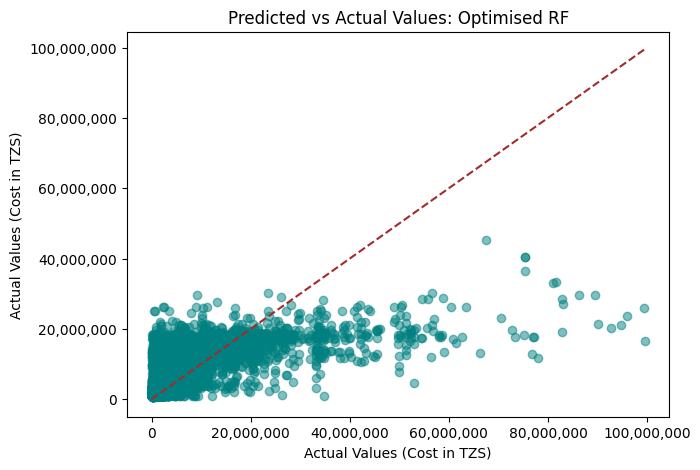

In [112]:
y_pred = model_rf_2.predict(X_train)
plot_model_results("Optimised RF", model_rf_2, y_train, y_pred)

In [553]:
evaluate_model("Train",model_rf_2, X_train, y_train)
evaluate_model("Test",model_rf_2, X_test, y_test)

Train RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_split=10,
                      n_estimators=200, random_state=42):
 - Mean Squared Error (MSE): 90155070433176.84
 - Root Mean Squared Error (RMSE): 9495002.392478732
 - Mean Absolute Error (MAE): 5368076.744303386
 - R-squared (R²): 0.4028082026792704

Test RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_split=10,
                      n_estimators=200, random_state=42):
 - Mean Squared Error (MSE): 106067155703637.94
 - Root Mean Squared Error (RMSE): 10298890.993871037
 - Mean Absolute Error (MAE): 5845418.601278316
 - R-squared (R²): 0.26711700400908345



## Grid Search Optimisation

In [432]:
model_rf_2= RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_split=10, n_estimators=200, random_state=RSEED)
model_rf_2.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_split=10,
                      n_estimators=200, random_state=42)

In [433]:
param_grid = [
    { 
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 15, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        "max_features":['sqrt', "log2", 2, 3, 5, 8, 10]
    }]


In [434]:

gs = GridSearchCV( 
    estimator=RandomForestRegressor(),
    param_grid= param_grid,
    cv=10,
    verbose=3, 
    error_score='raise',
    n_jobs=-1
)

#fit the model
gs.fit(X_train, y_train)

# Best score
print('Best score:', round(gs.best_score_, 3))

# Best parameters
print('Best parameters:', gs.best_params_)

Fitting 10 folds for each of 945 candidates, totalling 9450 fits
Best score: 0.281
Best parameters: {'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


In [437]:
model_rf_2_opt = gs.best_estimator_

In [438]:
evaluate_model("Train",model_rf_2_opt, X_train, y_train)
evaluate_model("Test",model_rf_2_opt, X_test, y_test)

Train RandomForestRegressor(max_depth=10, max_features=3, min_samples_leaf=2,
                      min_samples_split=5, n_estimators=50):
 - Mean Squared Error (MSE): 90888797679073.9
 - Root Mean Squared Error (RMSE): 9533561.647100937
 - Mean Absolute Error (MAE): 5398607.48344989
 - R-squared (R²): 0.39794795587767506

Test RandomForestRegressor(max_depth=10, max_features=3, min_samples_leaf=2,
                      min_samples_split=5, n_estimators=50):
 - Mean Squared Error (MSE): 106694668815679.97
 - Root Mean Squared Error (RMSE): 10329311.14913671
 - Mean Absolute Error (MAE): 5876560.131750475
 - R-squared (R²): 0.26278113126387725



In [ ]:
#this didn't change much. The previous one was actually better